##### 数据挖掘的基本任务
- 分类与预测
- 聚类分析
- 关联规则
- 时序模式
- 偏差检验
- 智能推荐

### 数据挖掘建模过程
##### 1. 定义挖掘目标
- 目标定义
    * 任务理解
    * 指标确定
- 数据采集
    * 建模抽样
    * 质量把控
    * 实时采集
- 数据整理
    * 数据探索
    * 数据清洗
    * 数据变换
- 构建模型
    * 模式发现
    * 构建模型
    * 验证模型
- 模型评价
    * 设定评价标准
    * 多模型对比
    * 模型优化
- 模型发布
    * 模型部署
    * 模型重构

##### 2. 数据取样
##### 3. 数据探索
- 异常值分析，缺失值分析，相关性分析，周期性分析
##### 4. 数据预处理
- 数据筛选，数据变量转换，缺失值处理，坏数据处理，数据标准化，主成分分析，属性选择，数据规约
##### 5. 挖掘建模
- 判断属于数据挖掘应用中的哪类问题(分类，聚类，关联规则，时序模式，只能推荐)
##### 6. 模型评价

##### 常用工具
- StatsModels, Gensim

In [16]:
# !pip3 install gensim
import gensim, logging
sentences = [['first', 'sentence'], ['second', 'sentence']]
model = gensim.models.Word2Vec(sentences, min_count=1)
print(model['sentence'])

### 3. 数据探索
##### 3.1. 数据质量分析
- 缺失值
- 异常值
    * 1. 简单的统计量分析
    * 2. 3sigma 原则: 在正态分布下，距离平均值 $ 3\sigma $之外的得概率 <= 0.003,属于小概率事件，如果不属于正态分布，也可以用远离平均值多少倍标准差来描述
    * 3. 箱形图分析: 
- 不一致的值
- 重复数据以及包含特殊符号

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')



In [30]:
# !pip install xlrd
sale_data = pd.read_excel('./data/catering_sale.xls', index_col=u'日期')
data = pd.read_excel('./data/catering_dish_profit.xls', index_col=u'菜品名')
data = pd.read_excel('./data/catering_sale_all.xls', index_col=u'日期')

### 箱线图

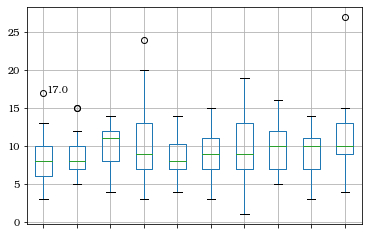

In [58]:
plt.figure()
p = data.boxplot(return_type='dict')
X = p['fliers'][0].get_xdata()
y = p['fliers'][0].get_ydata()
y = np.sort(y)
for i in range(len(X)):
    temp = y[i] - y[i - 1] if i != 0 else -78 / 3
    plt.annotate(y[i], xy=(X[i], y[i]), xytext=(X[i] + 0.05 - 0.8 / temp, y[i]))

##### 3.2 数据特征分析
- 1. 分布分析
- 定量数据的分布分析
    * 1. 求极差
    * 2. 决定组距和组数
    * 3. 决定分点
    * 4. 列出频率分布表
    * 5. 绘制频率分布直方图
    * 原则：
        - 各组之间必须是相互排斥的
        - 各组必须将所有数据包含在内
        - 各组的组宽最好相等
- 定型数据的分布分析
* 2. 对比分析
    - 绝对数比较: 利用绝对数进行比较，寻找差异
    - 相对数比较: 比较两个有联系的指标对比计算
        * 结构相对数
        * 比例相对数
        * 比较相对数
        * 强度相对数
        * 计划完成程度相对数
        * 动态相对数